# Explore here

                              track  duration  popularity
6               Llueve Sobre Mojado  5.481333          54
9                  Peor para el Sol  4.922217          60
7  La Canción Más Hermosa del Mundo  4.913550          61


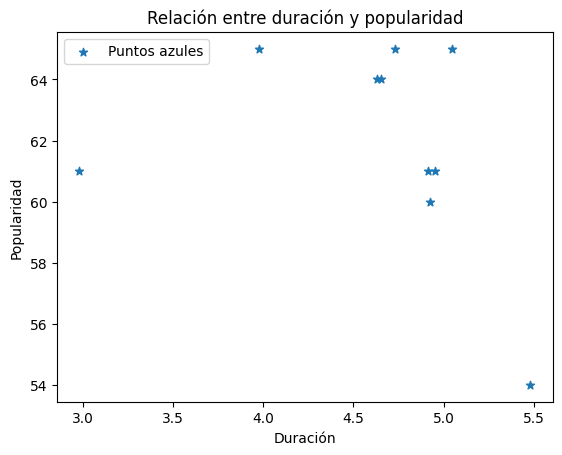

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Spotify API credentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
#elegimos a joaquin sabina y este es su id
joaquin_sabina = '4aeIWo5CMF1uRmqgJdwkZW'
results = spotify.artist_top_tracks(joaquin_sabina)

#elegimos las 10 canciones y elegimos la canción, duración que la pasamos a minutos y la popularidad
#for track in results['tracks'][:10]:
 #   duration_ms = track['duration_ms']
 #   duration_div = duration_ms / 1000 / 60
  #  duration_min = f'{int(duration_div)}:{int((duration_div % 1) * 60):02d}'
   # print('track    : ', track['name'])
#    print('duration    : ', duration_min)
 #   print('popularity   :', track['popularity'])
  #  print()

#para crear el dataframe pasamos los datos a una lista
tracks_data = []
for track in results['tracks']:
    duration_ms = track['duration_ms']
    duration_min = duration_ms / 1000 / 60
    #añadimos los datos
    tracks_data.append({
        'track': track['name'],
        'duration': duration_min,
        'popularity': track['popularity']
    })
df = pd.DataFrame(tracks_data)
df_sorted = df.sort_values(by='popularity', ascending=True)
print(df_sorted.head(3))

plt.scatter(df['duration'], df['popularity'], label="Puntos azules", marker='*')
plt.legend()
plt.title("Relación entre duración y popularidad")
plt.xlabel("Duración")
plt.ylabel("Popularidad")
plt.show()
